In [16]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('C:\\Users\\LEE CHANG YOUNG\\Documents\\GitHub\\python_normalmap_test\\normalmap_sample_img\\test_image\\battery.jpg', cv2.IMREAD_GRAYSCALE)

# Gabor 필터 설정
gabor = cv2.getGaborKernel((21, 21), 8.0, np.pi/4, 10.0, 0.5, 0, ktype=cv2.CV_32F)

# 필터 적용
filtered_img = cv2.filter2D(img, cv2.CV_8UC3, gabor)

# 결과 출력
cv2.namedWindow("Result",cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result",600,600)
cv2.imshow("Result", filtered_img)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_laplace

# 이미지 읽기
img = cv2.imread('C:\\Users\\LEE CHANG YOUNG\\Documents\\GitHub\\python_normalmap_test\\normalmap_sample_img\\test_image\\battery.jpg', cv2.IMREAD_GRAYSCALE)

# LoG 필터 적용
LoG = gaussian_laplace(img, 2)
LoG = LoG / LoG.max() * 255
LoG = np.uint8(LoG)

# 이진화
_, binary = cv2.threshold(LoG, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 결과 출력
cv2.namedWindow("Result",cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result",600,600)
cv2.imshow("Result", binary)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import cv2
import numpy as np

# 이미지 불러오기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 이진화
_, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY)  # 임계값을 200으로 변경

# 팽창과 침식
kernel = np.ones((3,3), np.uint8)  # 커널 크기를 3x3으로 변경
binary = cv2.dilate(binary, kernel, iterations=2)  # 반복 횟수를 2로 변경
binary = cv2.erode(binary, kernel, iterations=2)  # 반복 횟수를 2로 변경

# 결과 출력
cv2.namedWindow("Result",cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result",600,600)
cv2.imshow("Result", binary)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:


# 이미지 불러오기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# Sobel 필터 적용
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel = cv2.magnitude(sobelx, sobely)

# 밴드패스 필터 적용
low_passed = cv2.GaussianBlur(sobel, (125, 125), 0)
laplacian = cv2.Laplacian(sobel, cv2.CV_64F)
high_passed = cv2.convertScaleAbs(laplacian, alpha=6.0)
band_passed = cv2.addWeighted(sobel, 1, low_passed, -0.5, 0)
band_passed = cv2.convertScaleAbs(band_passed)
band_passed = cv2.addWeighted(band_passed, 1, high_passed, 0.5, 0)

# 노말맵 생성
norm = cv2.normalize(band_passed, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_rgb = cv2.cvtColor(norm, cv2.COLOR_GRAY2RGB)

dx, dy = np.gradient(norm)
dx = dx / np.max(np.abs(dx))
dy = dy / np.max(np.abs(dy))

normal_map = cv2.merge(((dx + 1) / 2 * 255, (dy + 1) / 2 * 255, np.ones_like(norm) * 255)).astype(np.uint8)

# 결과 출력
cv2.namedWindow("Result",cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result",1200,800)
cv2.imshow("Result", normal_map)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np

def shading_based_shading(image_path):
    # 이미지 불러오기
    img = cv2.imread(image_path)

    # 그림자 및 하이라이트 생성
    shadow = cv2.addWeighted(img, 0.5, np.zeros_like(img), 0.5, 0)
    highlight = cv2.addWeighted(img, 1.5, np.zeros_like(img), -0.5, 0)

    # 입체적인 효과 적용
    shaded_image = cv2.add(shadow, highlight)

    # 결과 출력
    cv2.namedWindow("Shading-based Shading", cv2.WINDOW_NORMAL)
    cv2.imshow("Shading-based Shading", shaded_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# 이미지 파일 경로
image_path = 'equalized_image.jpg'

# 셰이더 기반 채색 함수 호출
shading_based_shading(image_path)

In [8]:
from PIL import Image
import cv2
import numpy as np

def generate_normal_map(image_path, scale_factor):
    # 이미지 불러오기
    image = Image.open(image_path).convert('L')
    image = np.array(image)

    # 이미지의 크기
    width, height = image.shape[::-1]

    # 새로운 이미지 생성 (노멀 맵)
    normal_map = np.zeros((height, width, 3), dtype=np.uint8)

    # 픽셀 값 정규화 및 노멀 맵 생성
    for y in range(height):
        for x in range(width):
            pixel_value = image[y, x]
            normalized_value = pixel_value / 255.0  # 0 ~ 1 사이로 정규화

            # 노멀 벡터 계산 (Z-좌표는 그레이스케일 값으로, X-좌표와 Y-좌표는 픽셀의 위치로)
            normal_vector = (
                int((normalized_value - 0.5) * 255.0 * scale_factor),
                int((normalized_value - 0.5) * 255.0 * scale_factor),
                int(normalized_value * 255.0)
            )

            # 노멀 맵 이미지에 픽셀 값 설정
            normal_map[y, x] = normal_vector

    return normal_map

def dot_pattern(image_path, dot_size, dot_density):
    # 이미지 불러오기
    img = cv2.imread(image_path)

    # 도트 패턴 생성을 위한 이미지 크기 조정
    h, w, _ = img.shape
    new_w = (w // dot_size) * dot_size
    new_h = (h // dot_size) * dot_size
    img = cv2.resize(img, (new_w, new_h))

    # 도트 패턴 생성
    dot_img = np.zeros_like(img)
    h, w, _ = img.shape
    for y in range(0, h, dot_size):
        for x in range(0, w, dot_size):
            dot_img[y:y+dot_size, x:x+dot_size] = np.random.randint(0, 256, size=(dot_size, dot_size, 3))

    # 원본 이미지와 도트 패턴 간 섞어서 입체적인 효과 생성
    blended_image = cv2.addWeighted(img, 0.8, dot_img, 0.2, 0)

    return blended_image

# 이미지 파일 경로
image_path = 'equalized_image.jpg'

# 노멀 맵 생성
scale_factor = 1.0
normal_map = generate_normal_map(image_path, scale_factor)

# 도트 패턴 생성
dot_size = 5  # 도트의 크기
dot_density = 10  # 도트의 밀도 (도트 개수)
dot_pattern_image = dot_pattern(image_path, dot_size, dot_density)

# 노멀 맵과 도트 패턴 결합
dot_pattern_resized = cv2.resize(dot_pattern_image, (normal_map.shape[1], normal_map.shape[0]))
shaded_image = cv2.add(normal_map, dot_pattern_resized)

# 결과 출력
cv2.namedWindow("Shaded Image", cv2.WINDOW_NORMAL)
cv2.imshow("Shaded Image", shaded_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
import cv2
import numpy as np

def enhance_height(image_path, threshold):
    # 이미지 불러오기
    img = cv2.imread(image_path)

    # 그레이스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 그레이스케일 값으로 높이 차이 감지
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
    height_diff = cv2.magnitude(sobelx, sobely)

    # 높이 차이가 임계치 이상인 부분 강조
    enhanced_image = img.copy()
    enhanced_image[height_diff > threshold] = [0, 0, 255]  # 빨간색으로 강조

    return enhanced_image

# 이미지 파일 경로
image_path = 'equalized_image.jpg'

# 높이 차이 강조된 이미지 생성
threshold = 50  # 높이 차이로 강조할 임계치
enhanced_image = enhance_height(image_path, threshold)

# 결과 출력
cv2.namedWindow("result", cv2.WINDOW_NORMAL)
cv2.resizeWindow("result", 1200, 600)
cv2.imshow("result", enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [16]:
import cv2
import numpy as np

def enhance_text(image_path, threshold):
    # 이미지 불러오기
    img = cv2.imread(image_path)

    # 그레이스케일 변환
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 이진화를 통해 매직으로 쓴 글씨 부분 강조
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    # 스크래치 부분을 검은색으로 처리
    scratch_mask = cv2.bitwise_not(binary)
    enhanced_image = cv2.bitwise_and(img, img, mask=scratch_mask)

    return enhanced_image

# 이미지 파일 경로
image_path = 'equalized_image.jpg'

# 매직으로 쓴 글씨 강조 및 스크래치 부분 처리된 이미지 생성
threshold = 200  # 매직으로 쓴 글씨를 강조할 임계치
enhanced_image = enhance_text(image_path, threshold)

# 결과 출력
cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result", 800, 600)
cv2.imshow("Result", enhanced_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# Strength 조절
strength = 2.5
img = cv2.convertScaleAbs(img, alpha=strength)

# Level 조절
level = 7.0
img = cv2.convertScaleAbs(img, beta=level)

# Blur/Sharp 조절
blur_sharp = 0  # 이미지를 흐리게 만들기 위해 양수 값을, 이미지를 날카롭게 만들기 위해 음수 값을 사용합니다.
if blur_sharp > 0:
    img = cv2.GaussianBlur(img, (blur_sharp, blur_sharp), 0)
elif blur_sharp < 0:
    img = cv2.Laplacian(img, cv2.CV_64F)
    img = cv2.convertScaleAbs(img)

# Filter 적용 (Sobel 필터를 예로 들었습니다)
img = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
img = cv2.convertScaleAbs(img)

# Invert 적용
img = cv2.bitwise_not(img)

# 결과 출력
cv2.namedWindow("Result", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Result", 800, 600)
cv2.imshow("Result", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 하이트맵 생성 (밝기에 따라 높이를 나타냄)
height_map = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# 밴드 패스 필터 적용
# 먼저 가우시안 블러로 저역 통과 필터를 만듦
low_passed = cv2.GaussianBlur(height_map, (25,25), 0)

# 이미지 그래디언트를 사용해 고역 통과 필터를 만듦
laplacian = cv2.Laplacian(height_map, cv2.CV_64F)
high_passed = cv2.convertScaleAbs(laplacian, alpha=3.0)

# 저역과 고역을 결합해 밴드 패스 필터를 만듦
band_passed = cv2.addWeighted(height_map, 1, low_passed, -0.5, 0)
band_passed = cv2.addWeighted(band_passed, 1, high_passed, 0.5, 0)

# 노말맵 생성
norm = cv2.normalize(band_passed, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# 결과 출력
cv2.namedWindow("Height Map", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Height Map", 800, 600)
cv2.imshow("Height Map", height_map)

cv2.namedWindow("Band Pass Filtered", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Band Pass Filtered", 800, 600)
cv2.imshow("Band Pass Filtered", band_passed)

cv2.namedWindow("Normal Map", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Normal Map", 800, 600)
cv2.imshow("Normal Map", norm)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
import cv2
import numpy as np

# 이미지 불러오기
img = cv2.imread('equalized_image.jpg')

# SURF 객체 생성 (임계값 설정)
surf = cv2.xfeatures2d.SURF_create(400)

# 키포인트 검출
keypoints, descriptors = surf.detectAndCompute(img, None)

# 키포인트 그리기
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None, (0,255,0), 4)

# 창 크기 조절하고 결과 보기
cv2.namedWindow("SURF", cv2.WINDOW_NORMAL)
cv2.resizeWindow("SURF", 800, 600)
cv2.imshow("SURF", img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'xfeatures2d'

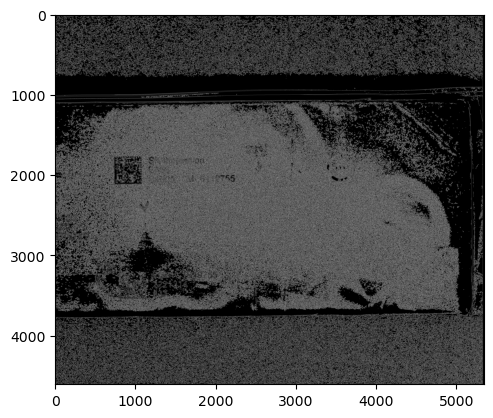

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 로드하고 그레이스케일로 변환
image = cv2.imread('equalized_image.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny edge detection 적용
edges = cv2.Canny(gray, threshold1=30, threshold2=100)

# 결과를 출력
plt.imshow(edges, cmap='gray')
plt.show()

In [6]:
import torch
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# MiDaS 모델 로드
model = torch.hub.load("intel-isl/MiDaS", "MiDaS")
model.eval()

# 이미지 로드 및 전처리
input_img = Image.open('equalized_image.jpg')
input_img = input_img.resize((384, 384), Image.BICUBIC)
input_img = np.array(input_img).astype(np.float32)
input_img = np.transpose(input_img, (2, 0, 1)) # 차원 변경
input_img = np.expand_dims(input_img, 0)
input_img /= 255.0
input_img = torch.Tensor(input_img)

# 깊이 예측
with torch.no_grad():
    prediction = model(input_img)

# 깊이 맵 시각화
plt.imshow(prediction.squeeze(), cmap='gray')
plt.show()

Using cache found in C:\Users\LEE CHANG YOUNG/.cache\torch\hub\intel-isl_MiDaS_master
Using cache found in C:\Users\LEE CHANG YOUNG/.cache\torch\hub\facebookresearch_WSL-Images_master


Loading weights:  None


ValueError: axes don't match array

In [7]:
import cv2
import numpy as np

# 이미지 읽기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 하이트맵 생성 (밝기에 따라 높이를 나타냄)
height_map = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

# Sobel 필터 적용
sobel_x = cv2.Sobel(height_map, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(height_map, cv2.CV_64F, 0, 1, ksize=5)

# Sobel 필터 결과를 하나로 합치기
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobel_x, 2.0), 0.5, cv2.pow(sobel_y, 2.0), 0.5, 0))
sobel = cv2.normalize(sobel, None, 0, 255, cv2.NORM_MINMAX)

# 결과 출력
cv2.namedWindow("Height Map", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Height Map", 800, 600)
cv2.imshow("Height Map", height_map)

cv2.namedWindow("Sobel Filtered", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Sobel Filtered", 800, 600)
cv2.imshow("Sobel Filtered", sobel)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread("equalized_image.jpg", cv2.IMREAD_GRAYSCALE)

# Sobel filter 크기
filter_size = 5

# Sobel filters
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=filter_size)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=filter_size)

# Normalized gradients
norm_sobel_x = cv2.normalize(sobel_x, None, 0, 255, cv2.NORM_MINMAX)
norm_sobel_y = cv2.normalize(sobel_y, None, 0, 255, cv2.NORM_MINMAX)

# Computed z value, as per the website (https://cpetry.github.io/NormalMap-Online/)
z = np.sqrt(255**2 - norm_sobel_x**2 - norm_sobel_y**2)

# Stack channels to create normal map
normal_map = np.dstack((norm_sobel_x, norm_sobel_y, z))

# Normalize normal map
normal_map = cv2.normalize(normal_map, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC3)

cv2.namedWindow('Normal Map',cv2.WINDOW_NORMAL)
cv2.resizeWindow("Normal Map", 1200,600)
cv2.imshow('Normal Map', normal_map)

cv2.waitKey(0)
cv2.destroyAllWindows()

C:\Users\LEE CHANG YOUNG\AppData\Local\Temp\ipykernel_11620\1997555562.py:19: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(255**2 - norm_sobel_x**2 - norm_sobel_y**2)


In [14]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread("equalized_image.jpg", cv2.IMREAD_GRAYSCALE)



# Sobel filter 적용
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

# Edge magnitude 계산
edge_magnitude = cv2.magnitude(sobel_x, sobel_y)

# 이미지를 0에서 255 사이로 normalize
edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)



cv2.namedWindow('Edge Magnitude',cv2.WINDOW_NORMAL)
cv2.resizeWindow("Edge Magnitude", 1200,600)
cv2.imshow('Edge Magnitude', edge_magnitude)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread("equalized_image.jpg", cv2.IMREAD_GRAYSCALE)

# Laplacian 필터 적용
laplacian = cv2.Laplacian(image, cv2.CV_64F)

# 결과를 0에서 255 사이로 normalize
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2.namedWindow('Laplacian', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Laplacian', 1200, 600)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
import cv2
import numpy as np

# 이미지 로드
image = cv2.imread("equalized_image.jpg", cv2.IMREAD_GRAYSCALE)



# Canny 엣지 검출 적용
edges = cv2.Canny(image, 100, 200)

cv2.namedWindow('Canny Edges', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Canny Edges', 1200, 600)
cv2.imshow('Canny Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
import cv2
import numpy as np

# 이미지 로드
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 노이즈 제거를 위해 스펙클 제거 필터 적용
dst = cv2.fastNlMeansDenoising(img, h=10, templateWindowSize=7, searchWindowSize=21)

cv2.namedWindow('Speckle Filter',cv2.WINDOW_NORMAL)
cv2.resizeWindow("Speckle Filter", 1200,600)
cv2.imshow('Speckle Filter', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
import cv2
import numpy as np

# 이미지 로드
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 노이즈를 줄이기 위한 가우시안 블러 적용
blur = cv2.GaussianBlur(img, (125,125), 0)

# 엣지 검출을 위한 라플라시안 필터 적용
laplacian = cv2.Laplacian(blur, cv2.CV_64F)

cv2.namedWindow('Laplacian Filter',cv2.WINDOW_NORMAL)
cv2.resizeWindow("Laplacian Filter", 1200,600)
cv2.imshow('Laplacian Filter', laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
import cv2
import numpy as np
from skimage import feature

# 이미지 불러오기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# LBP 계산
lbp = feature.local_binary_pattern(img, P=24, R=8, method="uniform")

# LBP 시각화
lbp_image = (lbp / lbp.max()) * 255  # LBP는 일반적으로 0과 1 사이의 값을 가지므로 255를 곱하여 이미지로 변환합니다.
lbp_image = lbp_image.astype(np.uint8)

# 이미지 출력
cv2.namedWindow('LBP', cv2.WINDOW_NORMAL)
cv2.resizeWindow("LBP", 1200, 600)
cv2.imshow('LBP', lbp_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
import cv2
import numpy as np

# 이미지 불러오기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 고주파 통과 필터 정의
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# 필터 적용
highpass_img = cv2.filter2D(img, -1, kernel)

# 이미지 출력
cv2.namedWindow('High-pass filter', cv2.WINDOW_NORMAL)
cv2.resizeWindow("High-pass filter", 1200, 600)
cv2.imshow('High-pass filter', highpass_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
import cv2
import numpy as np

# 이미지 불러오기
img = cv2.imread('equalized_image.jpg', cv2.IMREAD_GRAYSCALE)

# 그라디언트 계산을 위한 커널 정의
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# 그라디언트 계산
gradient = cv2.filter2D(img, cv2.CV_64F, kernel)

# 하이트맵 생성
height_map = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX)

# 노말맵 생성
sobelx = cv2.Sobel(height_map, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(height_map, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = cv2.magnitude(sobelx, sobely)
normal_map = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# 이미지 출력
cv2.namedWindow('Height Map', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Height Map', 1200, 600)
cv2.imshow('Height Map', height_map)

cv2.namedWindow('Normal Map', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Normal Map', 1200, 600)
cv2.imshow('Normal Map', normal_map)

cv2.waitKey(0)
cv2.destroyAllWindows()